dataset

In [8]:
import pandas as pd
df = pd.read_csv("C:/Users/seonahryu/Desktop/urp/average_sentiment_nasdaq.csv", index_col='date', parse_dates=True)

In [9]:
import pandas as pd

# 데이터 확인
print(df.head())  # 데이터의 처음 5행을 출력
# open : 주식 시장이 열릴 때 가격, 시장의 시작점 정보 -> 시장의 초기 반응 분석
# high : 특정 기간 동안의 최고 가격, 시장의 강세 -> 높은 가격은 강한 매수세, 지수 상승에 긍정적인 신호
# low : 특정 기간 동안의 최저 가격, 시장의 약세 -> 낮은 가격은 매도 압력, 지수 하락에 부정적인 신호
# volume : 거래량, 얼마나 많은 주식이 거래되었는지 -> 높은 거래량은 강한 시장 참여, 가격 변동에 대한 신뢰성 향상

            roberta_sentiment  vader_sentiment          Open          High  \
date                                                                         
2023-12-26          -0.312500         0.031250  15028.690430  15101.179688   
2023-12-27          -0.057143         0.285714  15089.660156  15114.080078   
2023-12-28          -0.840000        -0.480000  15142.089844  15150.070312   
2023-12-29          -0.800000        -0.500000  15099.200195  15111.410156   
2024-01-02          -0.137931         0.482759  14873.700195  14887.799805   

                     Low         Close      Volume     Adj Close  
date                                                              
2023-12-26  15024.059570  15074.570312  6120600000  15074.570312  
2023-12-27  15051.669922  15099.179688  7480170000  15099.179688  
2023-12-28  15087.219727  15095.139648  5090570000  15095.139648  
2023-12-29  14955.370117  15011.349609  5441060000  15011.349609  
2024-01-02  14682.379883  14765.940430  5791170000 

In [17]:
# 최대값과 최소값 계산
vader_max = df['vader_sentiment'].max()
vader_min = df['vader_sentiment'].min()

roberta_max = df['roberta_sentiment'].max()
roberta_min = df['roberta_sentiment'].min()

# 결과 출력
print(f"VADER Sentiment - 최대값: {vader_max}, 최소값: {vader_min}")
print(f"Roberta Sentiment - 최대값: {roberta_max}, 최소값: {roberta_min}")

VADER Sentiment - 최대값: 1.0, 최소값: -0.7142857142857143
Roberta Sentiment - 최대값: 1.0, 최소값: -1.0


In [18]:
df_spare = df.copy()

0~1 사이로 정규화

In [24]:
from sklearn.preprocessing import MinMaxScaler
features_to_scale = ['Open', 'High', 'Low', 'Volume', 'Close', 'Adj Close']
# MinMaxScaler를 사용하여 기본적인 정규화 (-1, 1 범위)
scaler = MinMaxScaler(feature_range=(0, 1))
df_spare[features_to_scale] = scaler.fit_transform(df_spare[features_to_scale])

In [27]:
# VADER Sentiment 정규화
min_vader = -0.7142857142857143
max_vader = 1.0
df_spare['vader_sentiment'] = (df_spare['vader_sentiment'] - min_vader) / (max_vader - min_vader)

# Roberta Sentiment 정규화
min_roberta = -1.0
max_roberta = 1.0
df_spare['roberta_sentiment'] = (df_spare['roberta_sentiment'] - min_roberta) / (max_roberta - min_roberta)

# 결과 확인
print(df_spare.head())

            roberta_sentiment  vader_sentiment      Open      High       Low  \
date                                                                           
2023-12-26           0.671875         0.670356  0.094139  0.085312  0.098873   
2023-12-27           0.735714         0.756944  0.104998  0.087624  0.103869   
2023-12-28           0.540000         0.496389  0.114336  0.094075  0.110301   
2023-12-29           0.550000         0.489583  0.106697  0.087146  0.086446   
2024-01-02           0.715517         0.823994  0.066536  0.047068  0.037055   

               Close    Volume  Adj Close  
date                                       
2023-12-26  0.099631  0.292827   0.099631  
2023-12-27  0.103976  0.458252   0.103976  
2023-12-28  0.103263  0.167499   0.103263  
2023-12-29  0.088469  0.210144   0.088469  
2024-01-02  0.045138  0.252744   0.045138  


정규화 전후의 VADER와 RoBERTa Sentiment 분포 시각화

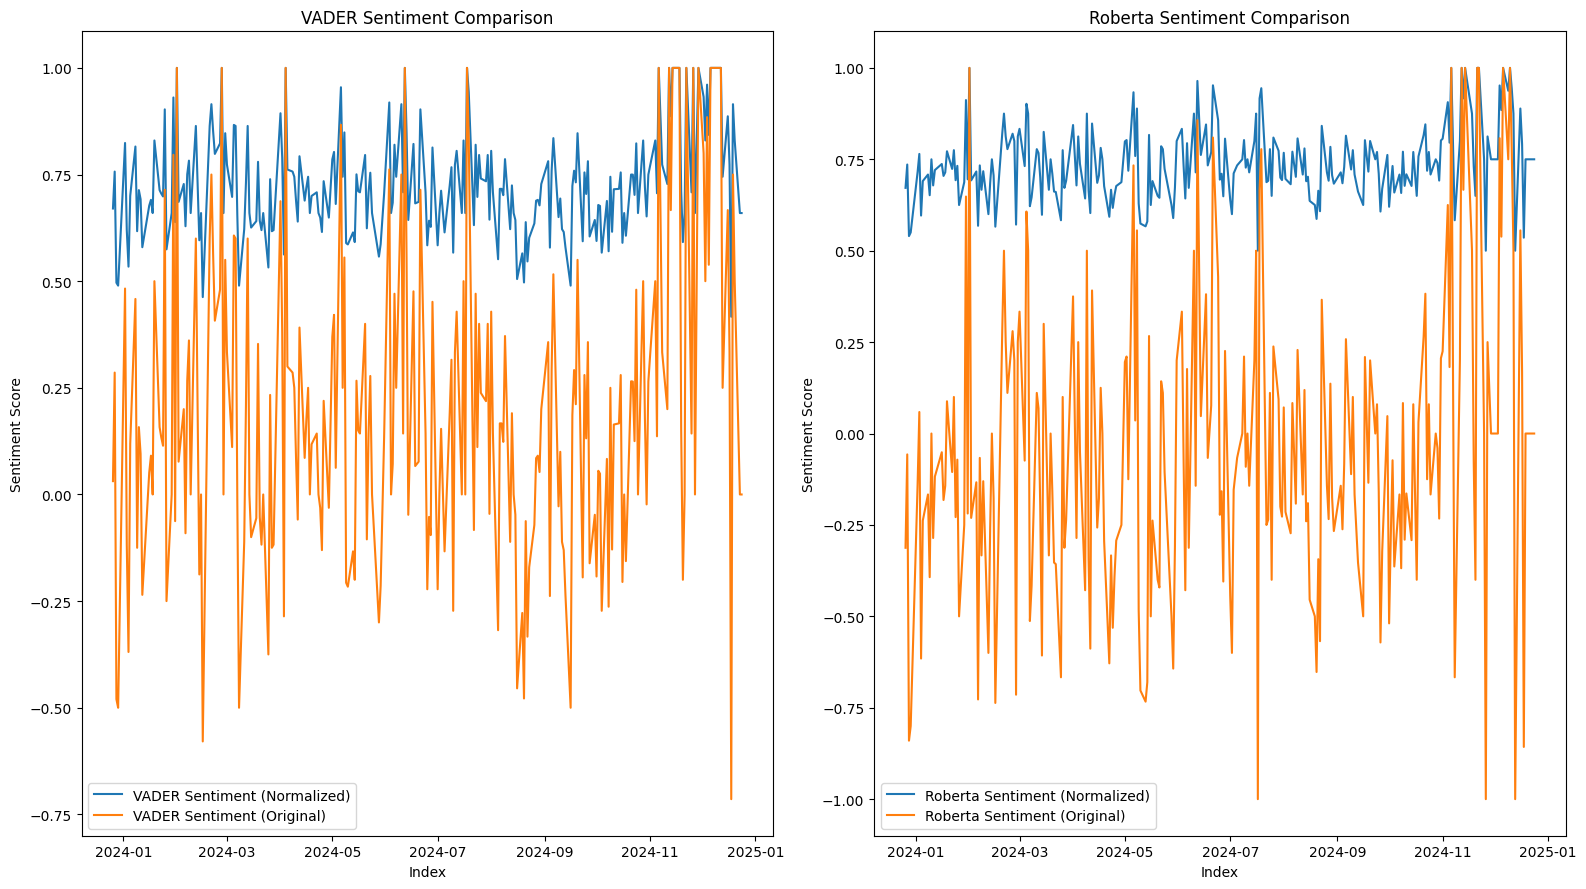

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

# 첫 번째 서브플롯: VADER Sentiment
sns.lineplot(ax=axes[0], x=df_spare.index, y=df_spare['vader_sentiment'], label='VADER Sentiment (Normalized)')
sns.lineplot(ax=axes[0], x=df.index, y=df['vader_sentiment'], label='VADER Sentiment (Original)')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Sentiment Score')
axes[0].set_title('VADER Sentiment Comparison')
axes[0].legend()

# 두 번째 서브플롯: Roberta Sentiment
sns.lineplot(ax=axes[1], x=df_spare.index, y=df_spare['roberta_sentiment'], label='Roberta Sentiment (Normalized)')
sns.lineplot(ax=axes[1], x=df.index, y=df['roberta_sentiment'], label='Roberta Sentiment (Original)')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Sentiment Score')
axes[1].set_title('Roberta Sentiment Comparison')
axes[1].legend()

# 전체 플롯 표시
plt.tight_layout()
plt.show()

많은 변수를 균등하게 통합하기 위해 각각 변수들을 모두 1차원 형태로 변환

In [47]:
# 모든 변수를 1차원 배열로 변환
features_1d = df_spare[['vader_sentiment', 'roberta_sentiment', 'Open', 'High', 'Low', 'Volume']].values.flatten()
target_1d = df_spare['Adj Close'].values.flatten()

In [48]:
print(f"X.shape : {features_1d.shape}")
print(f"y.shape : {target_1d.shape}")

X.shape : (1500,)
y.shape : (250,)


In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# 데이터셋을 7:3 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(features_1d.reshape(-1, 6), target_1d, test_size=0.3, random_state=42)

# 데이터셋 생성 함수 정의
def create_dataset(X, y, time_step=30):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 데이터셋 생성
X_train, y_train = create_dataset(X_train, y_train)
X_test, y_test = create_dataset(X_test, y_test)

# feature 수 정의
num_features = 6  # X의 열 수(특징 수)

# X의 형태 조정: (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], num_features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], num_features)

# LSTM 모델 정의
def create_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # input_shape 사용
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='tanh'))  # 출력층
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 다양한 배치 크기로 모델 학습
batch_sizes = [32, 64, 128, 256, 512]
for batch_size in batch_sizes:
    model = create_model()
    model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=0)

    # 예측 수행
    y_pred = model.predict(X_test)

    # MSE 및 RMSE 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}')

c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Batch Size: 32, MSE: 0.05661360324733195, RMSE: 0.23793613270651423


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step
Batch Size: 64, MSE: 0.04840263238869507, RMSE: 0.22000598262023482


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Batch Size: 128, MSE: 0.05215860299776123, RMSE: 0.2283825803290637


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Batch Size: 256, MSE: 0.05414772700057001, RMSE: 0.2326966415756145


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Batch Size: 512, MSE: 0.05475180054387993, RMSE: 0.23399102663110807


LSTM input {vader + roberta}

In [55]:
# 모든 변수를 1차원 배열로 변환
features_1d = df_spare[['vader_sentiment', 'roberta_sentiment']].values.flatten()
target_1d = df_spare['Adj Close'].values.flatten()

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# 데이터셋을 7:3 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(features_1d.reshape(-1, 2), target_1d, test_size=0.3, random_state=42)

# 데이터셋 생성 함수 정의
def create_dataset(X, y, time_step=30):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 데이터셋 생성
X_train, y_train = create_dataset(X_train, y_train)
X_test, y_test = create_dataset(X_test, y_test)

# feature 수 정의
num_features = 2  # X의 열 수(특징 수)

# X의 형태 조정: (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], num_features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], num_features)

# LSTM 모델 정의
def create_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # input_shape 사용
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='tanh'))  # 출력층
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 다양한 배치 크기로 모델 학습
batch_sizes = [32, 64, 128, 256, 512]
for batch_size in batch_sizes:
    model = create_model()
    model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=0)

    # 예측 수행
    y_pred = model.predict(X_test)

    # MSE 및 RMSE 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}')

c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Batch Size: 32, MSE: 0.05583092581653736, RMSE: 0.2362856868634606


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Batch Size: 64, MSE: 0.0506737909343888, RMSE: 0.2251083981871596


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Batch Size: 128, MSE: 0.05116150547267054, RMSE: 0.22618909229374995


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Batch Size: 256, MSE: 0.05255103389369032, RMSE: 0.22924012278327352


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Batch Size: 512, MSE: 0.052599747690744665, RMSE: 0.22934634876261856


LSTM input {nasdaq}

In [57]:
# 모든 변수를 1차원 배열로 변환
features_1d = df_spare[['Open', 'High', 'Low', 'Volume']].values.flatten()
target_1d = df_spare['Adj Close'].values.flatten()

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# 데이터셋을 7:3 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(features_1d.reshape(-1, 4), target_1d, test_size=0.3, random_state=42)

# 데이터셋 생성 함수 정의
def create_dataset(X, y, time_step=30):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 데이터셋 생성
X_train, y_train = create_dataset(X_train, y_train)
X_test, y_test = create_dataset(X_test, y_test)

# feature 수 정의
num_features = 4  # X의 열 수(특징 수)

# X의 형태 조정: (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], num_features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], num_features)

# LSTM 모델 정의
def create_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # input_shape 사용
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='tanh'))  # 출력층
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 다양한 배치 크기로 모델 학습
batch_sizes = [32, 64, 128, 256, 512]
for batch_size in batch_sizes:
    model = create_model()
    model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=0)

    # 예측 수행
    y_pred = model.predict(X_test)

    # MSE 및 RMSE 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}')

c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Batch Size: 32, MSE: 0.053471659538512045, RMSE: 0.23123939875919078


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Batch Size: 64, MSE: 0.057329994246269694, RMSE: 0.239436827255687


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Batch Size: 128, MSE: 0.06363876291534053, RMSE: 0.25226724503062325


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Batch Size: 256, MSE: 0.05221435220591715, RMSE: 0.22850459996664652


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Batch Size: 512, MSE: 0.05428887735153011, RMSE: 0.23299973680570996
